In [1]:
import sys

sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../src")

import os
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functional_autoencoders.util import pickle_load
from functional_autoencoders.datasets import get_dataloaders
from functional_autoencoders.datasets.navier_stokes import NavierStokes
from plots import set_plot_style_publication
from plots_rec_mse_vs_point_ratio import (
    plot_point_ratios,
    plot_error_vs_point_ratio,
    plot_error_distribution_per_index,
)

key = jax.random.PRNGKey(42)

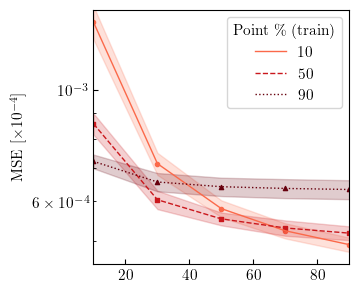

In [2]:
DATA_OUTPUT_DIR = "../../tmp/experiments/exp_rec_mse_vs_point_ratio/data"
SAVE_DIR = None
# SAVE_DIR = '../../figures/rec_mse_vs_point_ratio'
# os.makedirs(SAVE_DIR, exist_ok=True)

set_plot_style_publication()

plot_point_ratios(DATA_OUTPUT_DIR, SAVE_DIR)

In [3]:
VISCOSITY = 1e-4
ENC_POINT_RATIO_TEST_HIGH = 0.9
ENC_POINT_RATIO_TEST_LOW = 0.1
MODEL_OUT_DIR_HIGH = f'../../tmp/experiments/exp_rec_mse_vs_point_ratio/models/0/{ENC_POINT_RATIO_TEST_HIGH}'
MODEL_OUT_DIR_LOW = f'../../tmp/experiments/exp_rec_mse_vs_point_ratio/models/0/{ENC_POINT_RATIO_TEST_LOW}'

test_dataloader_full = get_dataloaders(
    NavierStokes, 
    data_base="../..", 
    viscosity=VISCOSITY, 
    resolution=64, 
    which="test",
)

info_low = pickle_load(os.path.join(MODEL_OUT_DIR_LOW, 'model.pkl'))
results_low = info_low['results']
autoencoder_low = info_low['autoencoder']
state_low = results_low['state']

info_high = pickle_load(os.path.join(MODEL_OUT_DIR_HIGH, 'model.pkl'))
results_high = info_high['results']
autoencoder_high = info_high['autoencoder']
state_high = results_high['state']

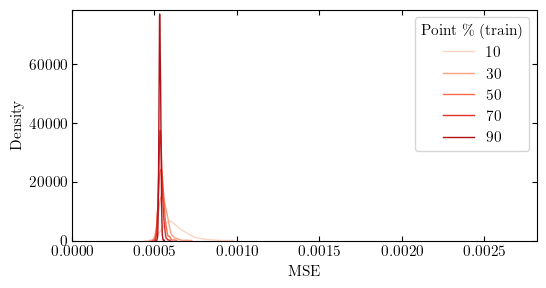

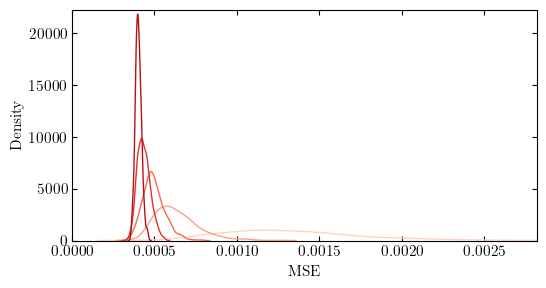

In [4]:
plt.rcParams['figure.figsize'] = (6, 3)

IDX = 1
N_RUNS = 1000
ENC_POINT_RATIO_TEST_LIST = [0.1, 0.3, 0.5, 0.7, 0.9]

set_plot_style_publication()

key, subkey = jax.random.split(key)
plot_error_vs_point_ratio(
    key=subkey, 
    idx=IDX,
    n_runs=N_RUNS, 
    state_high=state_high, 
    state_low=state_low, 
    autoencoder_high=autoencoder_high, 
    autoencoder_low=autoencoder_low, 
    test_dataloader_full=test_dataloader_full,  
    enc_point_ratio_test_list=ENC_POINT_RATIO_TEST_LIST,
    save_dir=SAVE_DIR,
)

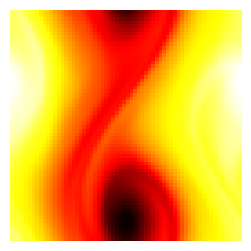

In [5]:
IDX = 1

u_full_ref, x_full_ref, _, _ = test_dataloader_full.dataset[IDX]
u_full_ref = jnp.array(u_full_ref)

plt.imshow(u_full_ref.reshape(64, 64), cmap='hot')
plt.axis('off')
plt.show()

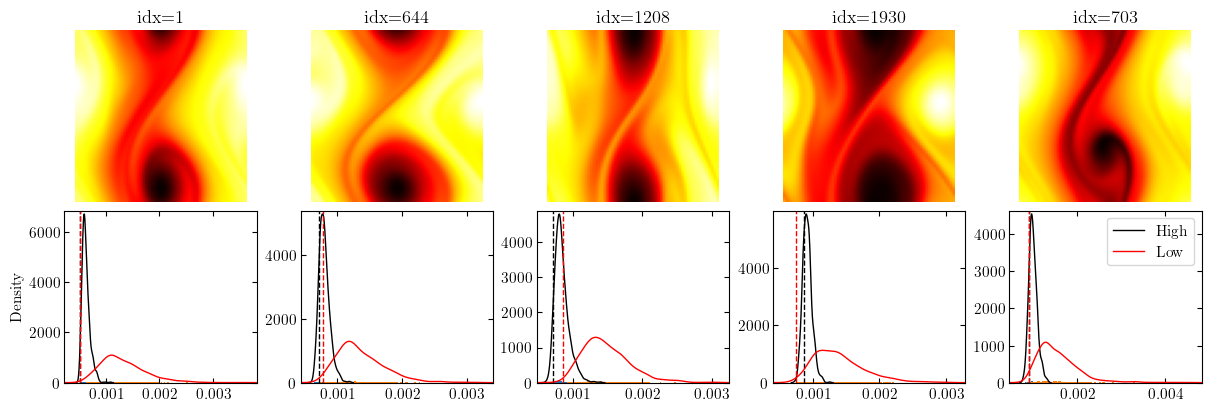

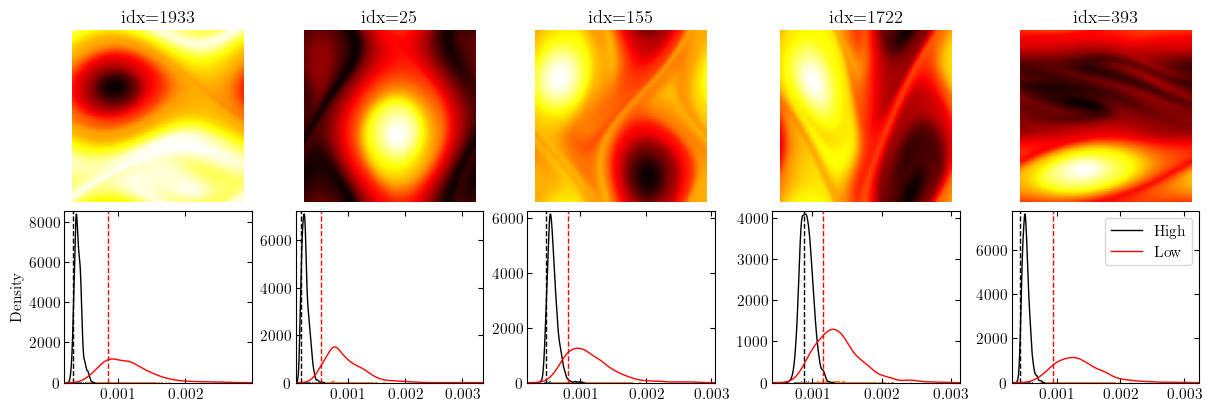

In [6]:
N_RUNS = 1000

set_plot_style_publication()

key, subkey = jax.random.split(key)
plot_error_distribution_per_index(
    key=subkey,
    n_runs=N_RUNS, 
    u_full_ref=u_full_ref,
    state_high=state_high, 
    state_low=state_low, 
    autoencoder_high=autoencoder_high, 
    autoencoder_low=autoencoder_low,
    enc_point_ratio_test_high=ENC_POINT_RATIO_TEST_HIGH,
    enc_point_ratio_test_low=ENC_POINT_RATIO_TEST_LOW,
    test_dataloader_full=test_dataloader_full,
    save_dir=SAVE_DIR,
)